# Fama-French Research Data & Risk Adjusted Return

In this notebook we are going to have a look at how to get the data from the fama and french research database. Then we will have a look at the risk adjusted return and the performance metrics.

In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.api as sm 
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, '../scripts/')
from database import Stock
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
date = dt.datetime.now()
modified_date = date - timedelta(days=1)
modified_date2 = date - timedelta(days=2500)
end = datetime.strftime(modified_date, "%Y-%m-%d")
plt.style.use('dark_background')
#French Database
import pandas_datareader.data as web  
from pandas_datareader.famafrench import get_available_datasets

## Fama-French Research Data

In [129]:
datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))

No. of datasets:297


In [130]:
df_5_factor = [dataset for dataset in datasets if '' in dataset and 'Factor' in dataset]
print(df_5_factor)

['F-F_Research_Data_Factors', 'F-F_Research_Data_Factors_weekly', 'F-F_Research_Data_Factors_daily', 'F-F_Research_Data_5_Factors_2x3', 'F-F_Research_Data_5_Factors_2x3_daily', 'F-F_Momentum_Factor', 'F-F_Momentum_Factor_daily', 'F-F_ST_Reversal_Factor', 'F-F_ST_Reversal_Factor_daily', 'F-F_LT_Reversal_Factor', 'F-F_LT_Reversal_Factor_daily', 'Developed_3_Factors', 'Developed_3_Factors_Daily', 'Developed_ex_US_3_Factors', 'Developed_ex_US_3_Factors_Daily', 'Europe_3_Factors', 'Europe_3_Factors_Daily', 'Japan_3_Factors', 'Japan_3_Factors_Daily', 'Asia_Pacific_ex_Japan_3_Factors', 'Asia_Pacific_ex_Japan_3_Factors_Daily', 'North_America_3_Factors', 'North_America_3_Factors_Daily', 'Developed_5_Factors', 'Developed_5_Factors_Daily', 'Developed_ex_US_5_Factors', 'Developed_ex_US_5_Factors_Daily', 'Europe_5_Factors', 'Europe_5_Factors_Daily', 'Japan_5_Factors', 'Japan_5_Factors_Daily', 'Asia_Pacific_ex_Japan_5_Factors', 'Asia_Pacific_ex_Japan_5_Factors_Daily', 'North_America_5_Factors', 'Nor

In [178]:
ds_factors = web.DataReader(df_5_factor[2],'famafrench',start='2018-06-18',end=end) 
print(ds_factors['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202012 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2020 Kenneth R. French

  0 : (641 rows x 4 cols)


In [179]:
factor = ds_factors[0].copy()/100

In [180]:
ds_factors = web.DataReader(df_5_factor[0],'famafrench',start='2018-06-18',end=end) 
print(ds_factors['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202012 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2020 Kenneth R. French

  0 : (31 rows x 4 cols)
  1 : Annual Factors: January-December (3 rows x 4 cols)


In [181]:
df_factor_monthly = ds_factors[0].copy()/100
df_factor_annually = ds_factors[0].copy()/100

<AxesSubplot:xlabel='Date'>

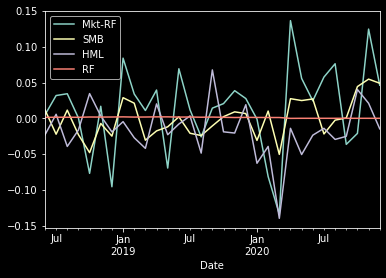

In [182]:
df_factor_annually.plot()

# Risk Adjusted Return

In [183]:
from pandas.tseries.offsets import BDay
end = pd.datetime.today().date()
start = end - 252 * BDay() * 20
import warnings
warnings.filterwarnings("ignore")
stk_end = pd.datetime.today().date()
stk_start = end - 252 * BDay() * 20

In [184]:
def get_adjusted_ohlc(sym, start_=stk_start, end_=stk_end):
    df = Stock(sym, start_, end_).df
    ohlc = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    #ohlc.reset_index(inplace=True)
    return ohlc

In [185]:
symbols = ['TTWO', '7CD.F', 'GME', 'ATVI', 'CCOEY', 'TCEHY', 'EA']
get_px = lambda x: get_adjusted_ohlc(x)['Close']
assets = pd.DataFrame({sym:get_px(sym) for sym in symbols}).dropna()

In [186]:
assets

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2018-06-18,120.69,40.75,13.97,76.74,11.54,51.33,144.67
2018-06-19,117.83,37.77,14.47,76.12,11.65,50.54,142.90
2018-06-20,118.01,37.58,14.44,75.73,11.88,50.53,143.35
2018-06-21,116.50,37.68,14.27,74.95,12.55,49.66,142.96
2018-06-22,116.96,36.56,14.26,74.88,12.67,50.17,141.07
...,...,...,...,...,...,...,...
2021-02-12,199.86,59.06,52.40,103.81,32.85,99.10,147.74
2021-02-16,195.79,60.44,49.51,102.96,32.50,96.10,145.78
2021-02-17,195.93,59.50,45.94,102.35,33.00,97.31,145.83


In [187]:
returns = (assets/assets.shift(1))-1

log_returns = np.log((assets/assets.shift(1)))
log_returns_means = log_returns.mean()*252

cov_mat = log_returns.cov()*252
corr_mat = log_returns.corr()

In [188]:
#set seed for reproduceable results
np.random.seed(600)
number_port = 25000
number_assets = len(assets.columns)

#array to store weights
weights_store = np.zeros((number_port,len(assets.columns)))

#array to store returns
returns_store = np.zeros(number_port)

#array to store returns
vol_store = np.zeros(number_port)

#array to store Sharpe Ratio info
sharpe_store=np.zeros(number_port)

#set Riskfree Rate, necessary for sharpe ratio
Rf = factor['RF'].mean()*252

for x in range(number_port):
    #Weights
    weights = np.array(np.random.random(number_assets))
    weights /= np.sum(weights)
    #Save Weights
    weights_store[x,:] = weights
    
    #Save Expected Returns
    returns_store[x] = np.sum(weights*log_returns.mean())*252
   
    #Save Expected Volatility
    vol_store[x] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
   
    #Save Sharpe Ratio
    sharpe_store[x] = (returns_store[x] - Rf)/vol_store[x]
    
print('Max Sharpe Ratio:',sharpe_store.max(),'Min Vol:',vol_store.min())

Max Sharpe Ratio: 0.9224419428460202 Min Vol: 0.2645035290083013


### Find location and allocation of Max Sharpe portfolio

In [189]:
max_sharpe_idx = np.argmax(sharpe_store)
max_sharpe_return = returns_store[max_sharpe_idx]
max_sharpe_vol = vol_store[max_sharpe_idx]
max_sharpe_wght = weights_store[max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights_store[max_sharpe_idx],index=returns.columns,columns=['Max_Sharpe_Allocation'])
max_sharpe_allocation.Max_Sharpe_Allocation = [round(i*100,2)for i in max_sharpe_allocation.Max_Sharpe_Allocation]
max_sharpe_allocation = max_sharpe_allocation.T

max_sharpe_allocation

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Max_Sharpe_Allocation,8.78,7.37,7.48,0.86,40.4,34.22,0.89


In [190]:
max_sharpe_return

0.2986586217892392

### Find location and allocation of Min Vol portfolio

In [191]:
min_vol_idx = np.argmin(vol_store)
min_vol_return = returns_store[min_vol_idx]
min_vol_vol = vol_store[min_vol_idx]
min_vol_allocation = pd.DataFrame(weights_store[min_vol_idx],index=returns.columns,columns=['Min_Vol_Allocation'])
min_vol_allocation.Min_Vol_Allocation = [round(i*100,2)for i in min_vol_allocation.Min_Vol_Allocation]
min_vol_allocation = min_vol_allocation.T

min_vol_allocation

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Min_Vol_Allocation,11.12,12.94,1.93,6.21,22.23,24.44,21.14


In [192]:
print('Max Sharpe Portfolio Returns = ',max_sharpe_return)
print('Max Sharpe Portfolio Vol = ',max_sharpe_vol)

Max Sharpe Portfolio Returns =  0.2986586217892392
Max Sharpe Portfolio Vol =  0.3084608074671272


## Benchmarket Return

In [193]:
benchmark_ret = factor['Mkt-RF']+factor['RF']
log_benchmark_ret = np.log(benchmark_ret+1) 

## Calculate Portfolio Beta

In [194]:
log_benchmark_ret.name="benchmark"

In [199]:
import statsmodels.formula.api as sm 
MKT_ret = log_benchmark_ret
#Calculate Betas for each individual asset 

#Create a list to hold Betas
outputs=[]

for column in log_returns:
    #concatentate market and log_returns[column] in to one dataframe
    df = pd.DataFrame({'Benchmark':MKT_ret,'Return':log_returns[column]}).dropna()
    
    #Conduct Linear Regression to find Beta
    rgress = sm.ols(formula = 'Return ~ Benchmark', data=df).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    
    #Collect individual Regressions 
    outputs.append(rgress.params[1]) 
#Calculate Weighted Average of Betas    
port_beta= np.sum(np.dot(outputs,(max_sharpe_allocation.T)/100))
print(port_beta)

0.7138051423780469


## Treynor Ratio

In [200]:
#Assign Riskfree Rate or Threshold
rf = factor['RF'].mean()*252

#Calculate Treynor Ratio
#Beta used to adjust for market risk
ms_Treynor = (max_sharpe_return - rf)/port_beta

mv_Treynor = (min_vol_return - rf)/port_beta

print('Max Sharpe Treynor = ', ms_Treynor)
print('Min Vol Treynor = ', mv_Treynor)

Max Sharpe Treynor =  0.3986202531182268
Min Vol Treynor =  0.26069623604397235


## Information Ratio

In [201]:
#Find excess returns less the Market Benchmark
ms_ret_less_bench = max_sharpe_return - MKT_ret.mean()
ms_info_ratio = ms_ret_less_bench/max_sharpe_vol

mv_ret_less_bench = min_vol_return - MKT_ret.mean()
mv_info_ratio = mv_ret_less_bench/min_vol_vol

print('Max Sharpe Info Ratio = ',ms_info_ratio)
print('Min Vol Info Ratio = ', mv_info_ratio)

Max Sharpe Info Ratio =  0.9663462291199797
Min Vol Info Ratio =  0.7547311985990812


## Lower Partial Moment

In [202]:
#Lower Partial Moment
_LPM=[]
for column in log_returns:
    y=log_returns[column][log_returns[column]-rf<0]
    m=len(y)
    total=0.0
    for i in sp.arange(m):
        total+=(y[i]-rf)**2
    _LPM.append(total/(m-1))
    

lpmf = pd.DataFrame(_LPM,index=returns.columns,columns=['LPM'])
print(lpmf)
Weighted_Avg_LPM= np.sum(np.dot(_LPM,(max_sharpe_allocation.T)/100))
print("Weighted Average LPM=",Weighted_Avg_LPM)

            LPM
TTWO   0.000914
7CD.F  0.001739
GME    0.007151
ATVI   0.000905
CCOEY  0.001117
TCEHY  0.000874
EA     0.000787
Weighted Average LPM= 0.0015083505273396631


## Omega Ratio

In [203]:
#First Order Lower Partial Moment
#A larger ratio indicates that the asset provides more gains relative to losses for some threshold r 
#and so would be preferred by an investor

ms_omega_ratio = (max_sharpe_return - rf) / Weighted_Avg_LPM
mv_omega_ratio = (min_vol_return -rf)/ Weighted_Avg_LPM

print('Min Vol Omega Ratio = ',mv_omega_ratio)
print('Max Sharpe Omega Ratio =',ms_omega_ratio)


Min Vol Omega Ratio =  123.37073545828656
Max Sharpe Omega Ratio = 188.64128819822693


## Sortino Ratio

In [204]:
#Second Order Lower Partial moment
TDD = np.sqrt(Weighted_Avg_LPM) 
ms_sortino_ratio = (max_sharpe_return - rf) /TDD
ms_sortino_ratio

mv_sortino_ratio = (min_vol_return - rf) /TDD
mv_sortino_ratio
print('Portfolio Standard Deviation = ',max_sharpe_vol)
print('Target Downside Deviation = ',TDD)
print('Max Sharpe Sortino Ratio = ',ms_sortino_ratio)
print('Min Volatility Sortino Ratio = ',mv_sortino_ratio)

Portfolio Standard Deviation =  0.3084608074671272
Target Downside Deviation =  0.03883748868477033
Max Sharpe Sortino Ratio =  7.326353895879136
Min Volatility Sortino Ratio =  4.791409542392998


In [205]:
#Third Partial Moment
ms_kappa_ratio = (max_sharpe_return - rf) / np.power(Weighted_Avg_LPM,float(1/3))
mv_kappa_ratio = (min_vol_return - rf) / np.power(Weighted_Avg_LPM,float(1/3))

print('Max_Sharpe_Kappa_Ratio = ',ms_kappa_ratio)
print('Min_Vol_Kappa_Ratio = ',mv_kappa_ratio)

Max_Sharpe_Kappa_Ratio =  2.481065747649881
Min_Vol_Kappa_Ratio =  1.6226082260755388
